## Import the Libraries and Pre processed data 

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud

# For Text Pre-processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter

# For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#For Model Validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

#For Model Building
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#For Model Accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# To save & load models
from pickle import dump
from pickle import load

#Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("dfc.xlsx")
df.head

<bound method NDFrame.head of                                                   Review Feedback   len  \
0      nice hotel expensive parking got good deal sta...      Pos   593   
1      ok nothing special charge diamond member hilto...      Neg  1689   
2      nice rooms not 4* experience hotel monaco seat...      Pos  1427   
3      unique, great stay, wonderful time hotel monac...      Pos   600   
4      great stay great stay, went seahawk game aweso...      Pos  1281   
...                                                  ...      ...   ...   
20486  best kept secret 3rd time staying charm, not 5...      Pos   733   
20487  great location price view hotel great quick pl...      Pos   306   
20488  ok just looks nice modern outside, desk staff ...      Neg   443   
20489  hotel theft ruined vacation hotel opened sept ...      Neg  5557   
20490  people talking, ca n't believe excellent ratin...      Neg   620   

       Feedback2                                     cleaned_review  

## Feature Engineering

In [4]:
#Lemmatization
wordnet=WordNetLemmatizer()

#Stop word
stop_words=stopwords.words('english')

nlp=spacy.load('en_core_web_sm')

In [5]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [6]:
corpus = []
for i in range(0, len(df)):
    # Removal of puntuations
    review = re.sub('[^a-zA-Z]', ' ', df['cleaned_review'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]

    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [6]:
pd.DataFrame(corpus).head()

,0
0,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...
2,nice room experience hotel monaco seattle good...
3,unique great stay wonderful time hotel monaco ...
4,great stay great stay go seahawk game awesome ...


In [7]:
# cleaned review added to the data frame
df['cleaned_review'] = corpus

In [8]:
tfidf = TfidfVectorizer(max_features=3000,
                       ngram_range=(1,3))
# TFIDF for X-train
corpus_tfidf= tfidf.fit_transform(corpus)

# save the model to disk
filename = 'TFIDF.pkl'
dump(tfidf, open('TFIDF.pkl', 'wb'))

In [9]:
corpus_tfidf

<20491x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 1522988 stored elements in Compressed Sparse Row format>

In [10]:
# Load the saved TF-IDF vectorizer
import pickle
with open('TFIDF2.pkl', 'rb') as f:
    tfidf = pickle.load(f)

In [14]:
# Creation of X and Y variable
X = corpus_tfidf
y = df['Feedback2']

In [13]:
# visualization of the imbalanced Y variable
df['Feedback2'].value_counts()

Feedback2
1    17277
0     3214
Name: count, dtype: int64

## Data Augmentation : SMOTE for Imbalanced Data to improve the performance of classification models 

In [15]:
# the minority class will over sampled by 80%
stregegy = 0.8

# initializing of SMOTEN Sampling
over = SMOTE(sampling_strategy= 'auto',random_state=7)

In [16]:
# Over Samplled X and Y variable 
X_over, y_over = over.fit_resample(X, y)

In [17]:
y_over.value_counts()

Feedback2
1    17277
0    13821
Name: count, dtype: int64

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,random_state=7,test_size=0.20,stratify=y_over)

In [19]:
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

X_train = (24878, 3000)
X_test = (6220, 3000)
y_train = (24878,)
y_test = (6220,)


## custom Fuction to run any model with confusion matrix + Train and test accuracy + F1score

In [19]:

def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
    f1_score = metrics.f1_score(y_train, predict_train)

    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    print('Fi Score {}'.format(f1_score))
    
    print(classification_report(y_test, predict_test))

    disp = ConfusionMatrixDisplay.from_estimator(estimator=model,
                                                 X=X_test,
                                                 y=y_test,
                                                 cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))    

## Model 1 Logistic Regression

Accuracy for Train set 0.9705169482328256
Accuracy for Test set 0.9496454926928085
Fi Score 0.9701257285290129
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3455
           1       0.97      0.93      0.95      3456

    accuracy                           0.95      6911
   macro avg       0.95      0.95      0.95      6911
weighted avg       0.95      0.95      0.95      6911



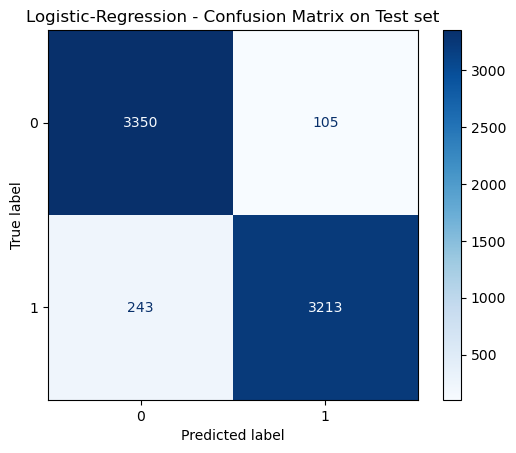

In [21]:
name = 'Logistic-Regression'
model_lr = LogisticRegression(C=5, penalty='l2', random_state=7)
model_lr.fit(X_train, y_train)

model_metric(X_train, X_test, y_train, y_test, model_lr,
                'Logistic-Regression')

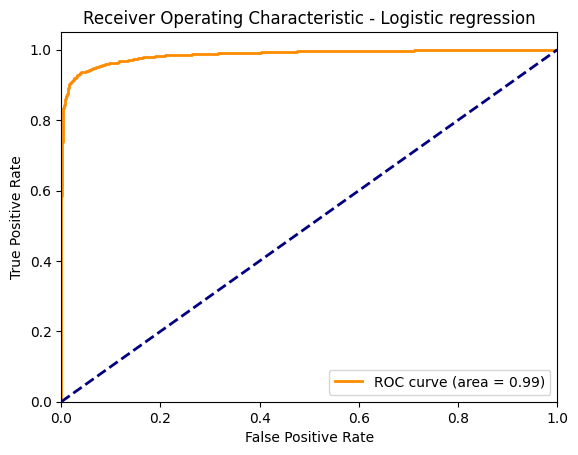

In [21]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.legend(loc="lower right")
plt.show()

## Model 2 KNeighborsClassifier

### hypere paramater tuning and kfold on knn

Accuracy for Train set 0.5046225580834472
Accuracy for Test set 0.47411575562700964
Fi Score 0.1954563258911085
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      2764
           1       1.00      0.05      0.10      3456

    accuracy                           0.47      6220
   macro avg       0.73      0.53      0.36      6220
weighted avg       0.76      0.47      0.34      6220



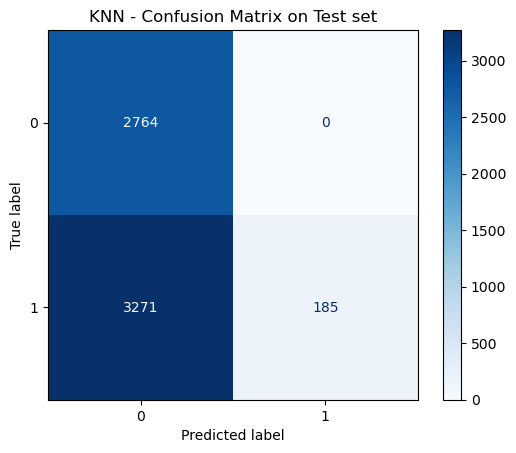

In [30]:
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model_knn.fit(X_train, y_train)
model_metric(X_train, X_test, y_train, y_test, model_knn, 'KNN')

In [39]:

# Grid Creation
Grid = dict()
Grid['n_neighbors'] = (1,3,5,7,9,11,13,15)
Grid['metric'] = ("minkowski","euclidean","manhattan")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = KNeighborsClassifier()

# Setting Grid search Cv
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'metric': 'manhattan', 'n_neighbors': 1}
Best Score - 0.9534545314999434


## Model 3 RandomForestClassifier

In [11]:
# Grid Creation
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = RandomForestClassifier()

# Setting Grid search Cv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fitting the Cv to train 
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

'# Grid Creation\nparam_grid = {\n    \'n_estimators\': [100, 200, 500],\n    \'max_depth\': [None, 10, 20, 30],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# K-fold\ncv = KFold(n_splits=5, shuffle=True, random_state=7)\n\n# Model\nmodel = RandomForestClassifier()\n\n# Setting Grid search Cv\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=\'accuracy\')\n\n# Fitting the Cv to train \ngrid_search.fit(X_train, y_train)\n\n# Best parameters and best score\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best Score: ", grid_search.best_score_)\n'

Accuracy for Train set 0.9795803521183375
Accuracy for Test set 0.9340836012861736
Fi Score 0.9819538188277087
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2764
           1       0.92      0.97      0.94      3456

    accuracy                           0.93      6220
   macro avg       0.94      0.93      0.93      6220
weighted avg       0.94      0.93      0.93      6220



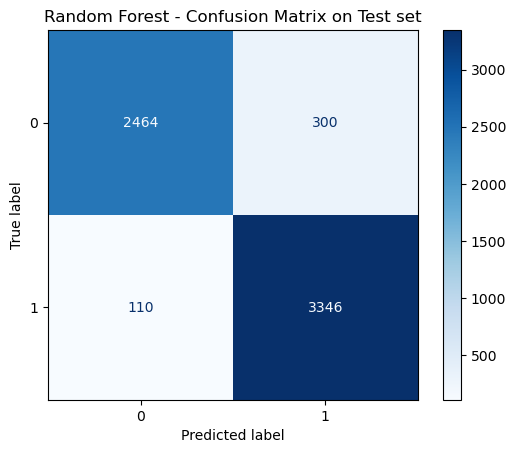

In [31]:
# define models and parameters
num_trees = 1000
model = RandomForestClassifier(n_estimators=num_trees, max_features=30,max_depth=24)
model.fit(X_train, y_train)

#Results
model_metric(X_train,X_test,y_train,y_test,model, 'Random Forest')

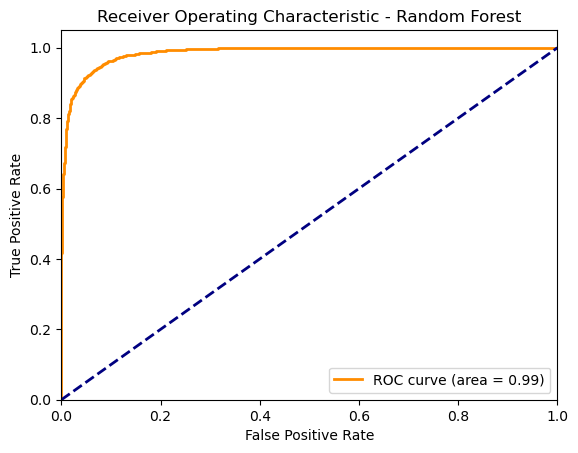

In [34]:

# Predict probabilities for the test set
y_pred_proba_rfc = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve,auc
# Calculate ROC curve
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_proba_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rfc, tpr_rfc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Model 4 Support vector machine

Accuracy for Train set 0.9838813409438057
Accuracy for Test set 0.9516077170418007
Fi Score 0.9853751048542981
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2764
           1       0.98      0.93      0.96      3456

    accuracy                           0.95      6220
   macro avg       0.95      0.95      0.95      6220
weighted avg       0.95      0.95      0.95      6220



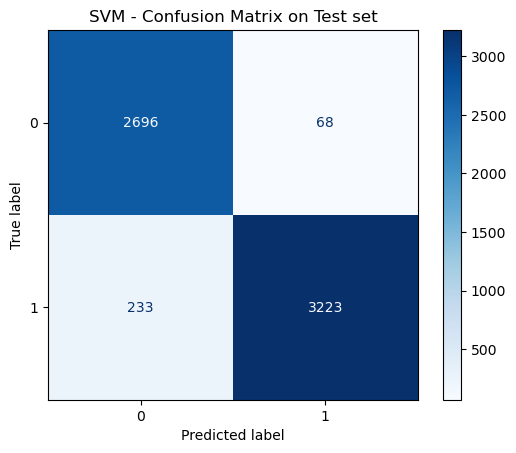

In [35]:
# Define model
model_svc = SVC(C=10, kernel='linear', gamma=100)
model_svc.fit(X_train, y_train)

#Results
model_metric(X_train, X_test, y_train, y_test, model_svc, "SVM")

In [28]:
# Grid Creation
param_grid = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'rbf'],
  'gamma': [0.1,1, 'scale']
}

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = SVC()

# Setting Grid search Cv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')

# Fitting the Cv to train 
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

KeyboardInterrupt: 

## Model 5 Naive BAyes Classification

Accuracy for Train set 0.9050566765817187
Accuracy for Test set 0.8958199356913183
Fi Score 0.913282913576621
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2764
           1       0.92      0.89      0.90      3456

    accuracy                           0.90      6220
   macro avg       0.89      0.90      0.89      6220
weighted avg       0.90      0.90      0.90      6220



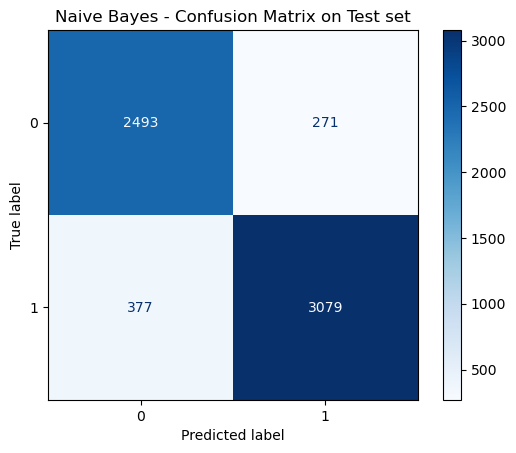

In [36]:
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train)

#Results
model_metric(X_train, X_test, y_train, y_test, model_naive, "Naive Bayes")

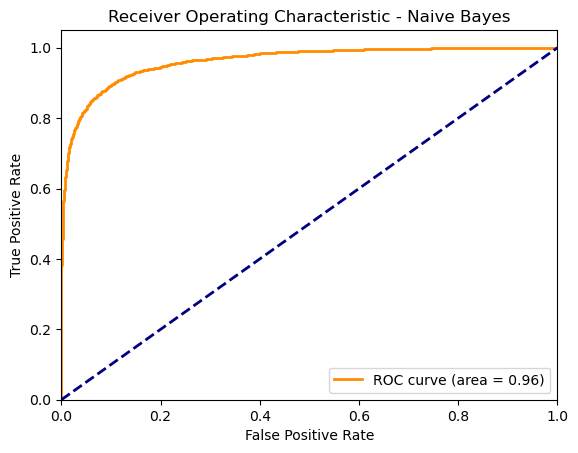

In [37]:
# Predict probabilities for the test set
y_pred_proba_nb = model_naive.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## Comapring all the models

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = [model_lr, model_knn, model, model_svc, model_naive]
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes']

# Define evaluation metric
scoring = 'accuracy'  

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
    print(f"{name}: Mean accuracy: {scores.mean():.3f}")

Logistic Regression: Mean accuracy: 0.943
KNN: Mean accuracy: 0.471
Random Forest: Mean accuracy: 0.929
SVM: Mean accuracy: 0.945
Naive Bayes: Mean accuracy: 0.901


## Crossvalidation with  kfold for logistic regression

In [20]:
# Grid Creation
Grid = dict()
Grid['C'] = (0.001, 0.01, 0.1, 0.18, 0.2, 1,5)
Grid['penalty'] = ("l1", "l2", "elasticnet")

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Model
model = LogisticRegression()

# Setting Grid search Cv
search = GridSearchCV(model, Grid, cv=cv)

# Fitting the Cv to train and test
search.fit(X_train, y_train)

print('Best Param - {}'.format(search.best_params_))
print('Best Score - {}'.format(search.best_score_))

Best Param - {'C': 5, 'penalty': 'l2'}
Best Score - 0.9486307494832535


## Training the final model on the full data before deployment

In [30]:
#using the best parameters on the final model
model_lr = LogisticRegression(C=5, penalty='l2')
model_lr.fit(X, y)

LogisticRegression(C=5)

In [31]:
y_pred = model_lr.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9593968083548875


## Final Model accucracy is with 95.939%

In [23]:
# Save the model to a file
import pickle
filename = 'lrmodel.pkl'
pickle.dump(model_lr, open(filename, 'wb'))

## Check The Finalized Model before deployment

#### Check if the loaded TFIDF vectorizer is fitted

In [43]:
# Load the saved model
loaded_model = pickle.load(open('lrmodel.pkl', 'rb'))

# Load the saved TF-IDF vectorizer
tfidf = pickle.load(open('TFIDF2.pkl', 'rb'))

# Function to preprocess user input
def preprocess_text(text):
    # Removal of puntuations
    review = re.sub('[^a-zA-Z]', ' ', text)

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()

    # Applying Lemmitization for the words eg: Argument -> Argue - Using Spacy Library
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]

    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    return review

# Get user input
user_input = input("Enter your review: ")

# Preprocess the user input
processed_input = preprocess_text(user_input)

# Transform the preprocessed input using TF-IDF
input_tfidf = tfidf.transform([processed_input])

# Make prediction
prediction = loaded_model.predict(input_tfidf)[0]

# Print the prediction
if prediction == 1:
    print("Positive Feedback")
else:
    print("Negative Feedback")


Enter your review:  clean sheets good service


Positive Feedback


## Final Model Successfully predicts the sentiment of a given text review